<a href="https://colab.research.google.com/github/el-thobhy/rainfall-prediction/blob/master/test_code_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data preprocessing

In [741]:
import pandas as pd
import seaborn as sns

### Data Loading

In [742]:
data_baru = pd.read_excel('2022 Feb 2023 perjam.xlsx')
data_baru

,Date and Time,Air Tmp (C) M 60 Min,Mag WD 60 Min (deg) M,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,True WD 60 Min (deg) M,WS 60 Min (kt) M,klasifikasi
0,1/12/2022 0:00,23.73,82.0,29.7,1009.01,100.0,84.0,2.0,rain
1,1/12/2022 1:00,26.51,61.0,29.5,1009.35,92.9,63.0,2.0,rain
2,1/12/2022 2:00,28.45,3.0,23.5,1009.47,81.8,5.0,2.0,rain
3,1/12/2022 3:00,29.59,340.0,21.9,1009.11,75.2,342.0,2.0,rain
4,1/12/2022 4:00,30.68,297.0,19.9,1008.14,69.8,299.0,4.0,rain
...,...,...,...,...,...,...,...,...,...
2035,23/02/2023 19:00:00,25.00,269.0,NaN,1008.60,90.0,271.0,2.0,no rain
2036,23/02/2023 20:00:00,24.70,301.0,NaN,1008.37,92.2,303.0,2.0,no rain
2037,23/02/2023 21:00:00,24.31,312.0,NaN,1008.40,92.9,314.0,2.0,no rain
2038,23/02/2023 22:00:00,24.43,334.0,NaN,1008.74,92.0,336.0,4.0,no rain


### Explanatory Data Analysis

_*Variable description*_

- Date and Time = Date and Time
- Air Tmp (C) M 60 Min
- Mag WD 60 Min (deg) M
- Precip 1Hr (mm) M
- QNH (hPa) M
- RH (%) M 60 Min
- True WD 60 Min (deg) M
- WS 60 Min (kt) M
- klasifikasi

In [743]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2040 entries, 0 to 2039
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date and Time           2040 non-null   object 
 1   Air Tmp (C) M 60 Min    1905 non-null   float64
 2   Mag WD 60 Min (deg) M   1906 non-null   float64
 3   Precip 1Hr (mm) M       1918 non-null   float64
 4   QNH (hPa) M             1917 non-null   float64
 5   RH (%) M 60 Min         1906 non-null   float64
 6   True WD 60 Min (deg) M  1906 non-null   float64
 7   WS 60 Min (kt) M        1906 non-null   float64
 8   klasifikasi             2040 non-null   object 
dtypes: float64(7), object(2)
memory usage: 143.6+ KB


In [744]:
data_baru.sort_values(by=['Date and Time'], inplace=True, ascending=True)
data_baru.set_index('Date and Time', inplace= True)

#### Missing value

In [745]:
data_baru.describe()

,Air Tmp (C) M 60 Min,Mag WD 60 Min (deg) M,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,True WD 60 Min (deg) M,WS 60 Min (kt) M
count,1905.000000,1906.000000,1918.000000,1917.000000,1906.000000,1906.000000,1906.000000
mean,26.352551,204.625918,0.273045,1009.294476,84.791501,203.342078,3.754460
std,2.817952,118.346611,1.829971,2.000466,13.232921,118.879535,2.439298
min,21.920000,2.000000,0.000000,1002.980000,43.300000,1.000000,0.000000
25%,24.100000,78.000000,0.000000,1008.000000,74.925000,78.000000,2.000000
50%,25.400000,247.500000,0.000000,1009.350000,89.400000,245.000000,3.000000
75%,28.640000,305.750000,0.000000,1010.670000,96.000000,305.000000,5.000000
max,33.710000,360.000000,29.700000,1014.260000,100.000000,360.000000,13.000000


_ada lebih dari 100 data yang hilang, total data adalah 2039, dan yang terhitung 1900_

In [746]:
data_baru.isnull().sum()

Air Tmp (C) M 60 Min      135
Mag WD 60 Min (deg) M     134
Precip 1Hr (mm) M         122
QNH (hPa) M               123
RH (%) M 60 Min           134
True WD 60 Min (deg) M    134
WS 60 Min (kt) M          134
klasifikasi                 0
dtype: int64

In [747]:
data_baru = data_baru.dropna(how='any',axis=0) 
data_baru.count()

Air Tmp (C) M 60 Min      1783
Mag WD 60 Min (deg) M     1783
Precip 1Hr (mm) M         1783
QNH (hPa) M               1783
RH (%) M 60 Min           1783
True WD 60 Min (deg) M    1783
WS 60 Min (kt) M          1783
klasifikasi               1783
dtype: int64

In [748]:
data_baru.isnull().sum()

Air Tmp (C) M 60 Min      0
Mag WD 60 Min (deg) M     0
Precip 1Hr (mm) M         0
QNH (hPa) M               0
RH (%) M 60 Min           0
True WD 60 Min (deg) M    0
WS 60 Min (kt) M          0
klasifikasi               0
dtype: int64

#### Pesebaran data

dilihat dengan histogram

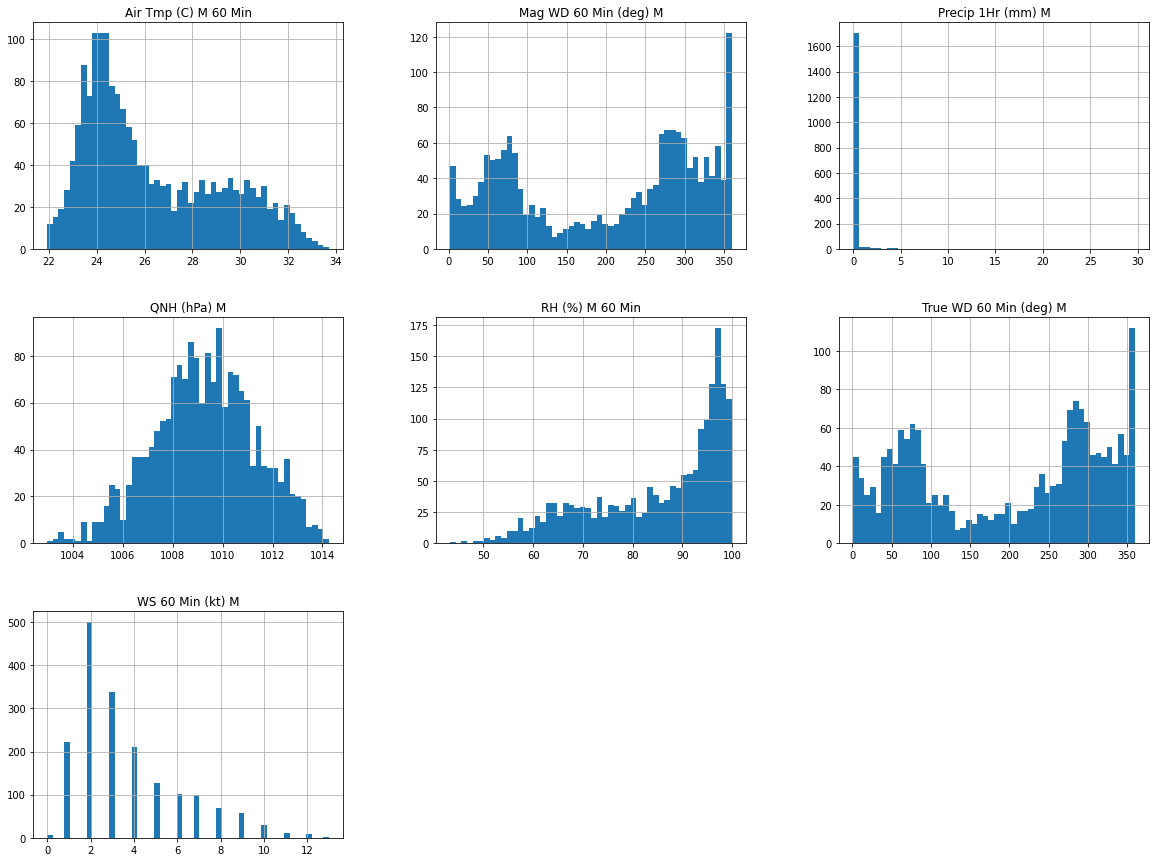

In [749]:
import matplotlib.pyplot as plt

data_baru.hist(bins=50, figsize=(20,15))
plt.show()

#### Matriks korelasi

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

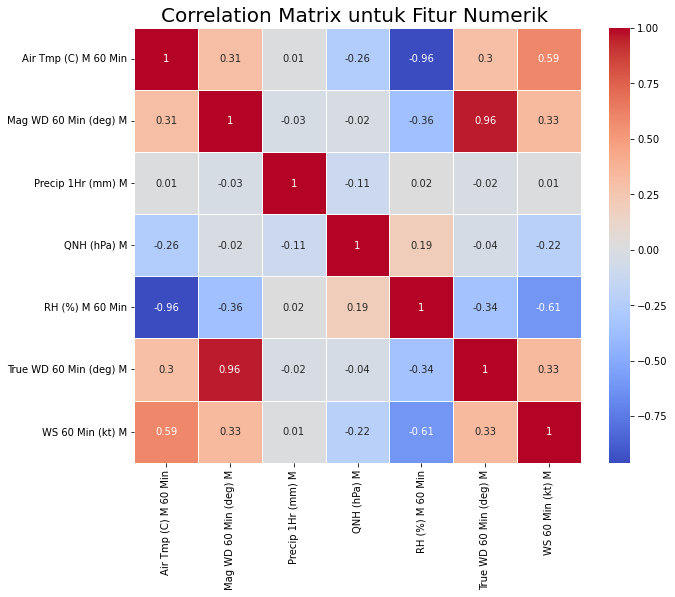

In [750]:
plt.figure(figsize=(10, 8))
correlation_matrix = data_baru.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [751]:
# Get the correlation coefficients for "rain_sum" feature
rain_corr = data_baru.corr()['Precip 1Hr (mm) M'].sort_values(ascending=False)
rain_corr

Precip 1Hr (mm) M         1.000000
RH (%) M 60 Min           0.021026
Air Tmp (C) M 60 Min      0.009483
WS 60 Min (kt) M          0.005413
True WD 60 Min (deg) M   -0.024385
Mag WD 60 Min (deg) M    -0.028815
QNH (hPa) M              -0.112277
Name: Precip 1Hr (mm) M, dtype: float64

### Data preparation

#### one-hot encoding

mengubah data kategori dengan one-hot encoding

In [752]:
data_baru = pd.get_dummies(data_baru)
data_baru

,Air Tmp (C) M 60 Min,Mag WD 60 Min (deg) M,Precip 1Hr (mm) M,QNH (hPa) M,RH (%) M 60 Min,True WD 60 Min (deg) M,WS 60 Min (kt) M,klasifikasi_no rain,klasifikasi_rain
Date and Time,,,,,,,,,
1/1/2023 0:00,23.16,36.0,0.0,1012.80,91.8,38.0,3.0,1,0
1/1/2023 10:00,28.85,287.0,0.0,1009.10,72.0,289.0,13.0,1,0
1/1/2023 11:00,27.30,297.0,0.0,1009.94,77.6,299.0,9.0,1,0
1/1/2023 12:00,26.37,297.0,0.0,1011.04,82.0,299.0,6.0,1,0
1/1/2023 13:00,25.82,293.0,0.0,1012.15,84.6,295.0,4.0,1,0
...,...,...,...,...,...,...,...,...,...
9/2/2023 5:00,31.46,276.0,0.0,1008.42,61.6,278.0,6.0,1,0
9/2/2023 6:00,32.10,284.0,0.0,1007.59,58.3,286.0,7.0,1,0
9/2/2023 7:00,32.02,286.0,0.0,1006.90,59.0,288.0,8.0,1,0


In [753]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 1/1/2023 0:00 to 9/2/2023 9:00
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Air Tmp (C) M 60 Min    1783 non-null   float64
 1   Mag WD 60 Min (deg) M   1783 non-null   float64
 2   Precip 1Hr (mm) M       1783 non-null   float64
 3   QNH (hPa) M             1783 non-null   float64
 4   RH (%) M 60 Min         1783 non-null   float64
 5   True WD 60 Min (deg) M  1783 non-null   float64
 6   WS 60 Min (kt) M        1783 non-null   float64
 7   klasifikasi_no rain     1783 non-null   uint8  
 8   klasifikasi_rain        1783 non-null   uint8  
dtypes: float64(7), uint8(2)
memory usage: 114.9+ KB


In [754]:
data_baru = data_baru.drop(data_baru.columns[[1,5]], axis=1)

Membagi data train dataset

In [755]:
data_baru.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1783 entries, 1/1/2023 0:00 to 9/2/2023 9:00
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Air Tmp (C) M 60 Min  1783 non-null   float64
 1   Precip 1Hr (mm) M     1783 non-null   float64
 2   QNH (hPa) M           1783 non-null   float64
 3   RH (%) M 60 Min       1783 non-null   float64
 4   WS 60 Min (kt) M      1783 non-null   float64
 5   klasifikasi_no rain   1783 non-null   uint8  
 6   klasifikasi_rain      1783 non-null   uint8  
dtypes: float64(5), uint8(2)
memory usage: 87.1+ KB


pertama untuk data fitur hapus kolom precip, dan klasifikasi

In [756]:
from sklearn import preprocessing

df_new = data_baru
X = df_new.drop(df_new.columns[[1,5,6]], axis=1)

In [757]:
y = df_new[['klasifikasi_rain','klasifikasi_no rain']]

In [758]:
from sklearn.model_selection import train_test_split
#40 best random state
#32 better random state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, test_size = 0.20, random_state=32)

In [759]:
pd.DataFrame(X_train)

,Air Tmp (C) M 60 Min,QNH (hPa) M,RH (%) M 60 Min,WS 60 Min (kt) M
Date and Time,,,,
28/12/2022 15:00:00,24.69,1013.28,85.6,2.0
14/01/2023 06:00:00,30.75,1008.73,64.7,4.0
31/12/2022 15:00:00,24.36,1013.56,83.0,4.0
2/2/2023 5:00,30.00,1008.94,70.3,5.0
18/02/2023 04:00:00,30.91,1010.43,61.4,6.0
...,...,...,...,...
10/1/2023 2:00,28.31,1013.05,73.2,4.0
21/12/2022 00:00:00,23.86,1007.89,94.2,3.0
3/12/2022 23:00,23.48,1009.18,97.2,2.0


In [760]:
pd.DataFrame(y_train)

,klasifikasi_rain,klasifikasi_no rain
Date and Time,,
28/12/2022 15:00:00,0,1
14/01/2023 06:00:00,0,1
31/12/2022 15:00:00,0,1
2/2/2023 5:00,0,1
18/02/2023 04:00:00,0,1
...,...,...
10/1/2023 2:00,0,1
21/12/2022 00:00:00,0,1
3/12/2022 23:00,1,0


## Model Development

mendefenisikan hyperparameter

In [761]:
from scipy.stats import uniform, randint
import numpy as np
params = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(-3, 0, 50)
}
params

{'n_estimators': [100],
 'max_depth': [6],
 'learning_rate': array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
        0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
        0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
        0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
        0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
        0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
        0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
        0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
        0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
        0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ])}

Tuning dengan RSCV

In [762]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor, XGBClassifier


In [763]:
# Define the XGBoost model
xgb_model = XGBClassifier(
    objective='binary:logistic'
    )
coarse_iter = 50
# Perform random search
search = RandomizedSearchCV(
    xgb_model, param_distributions=params, 
    n_iter=coarse_iter, 
    cv=10, 
    verbose=100,
    scoring='roc_auc', 
    n_jobs=-1
    )
search.fit(X_train, y_train)
print("Best hyperparameters: ", search.best_params_)
print("AUC_ROC", search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters:  {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.0517947467923121}
AUC_ROC 0.809231875462963


In [764]:
#fine search
best_params = search.best_params_
param_dist = {
    'n_estimators': [100],
    'max_depth': [6],
    'learning_rate': np.logspace(np.log10(best_params['learning_rate']-0.01), np.log10(best_params['learning_rate']+0.1), 50),
}

fine_search = GridSearchCV(
    xgb_model, param_grid=param_dist, 
    cv=10, 
    verbose=100,
    scoring='roc_auc', 
    n_jobs=-1
    )
fine_search.fit(X_train, y_train)

print("Best hyperparameters: ", fine_search.best_params_)
print("AUC_ROC", fine_search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameters:  {'learning_rate': 0.06891550127383908, 'max_depth': 6, 'n_estimators': 100}
AUC_ROC 0.8116273985915738


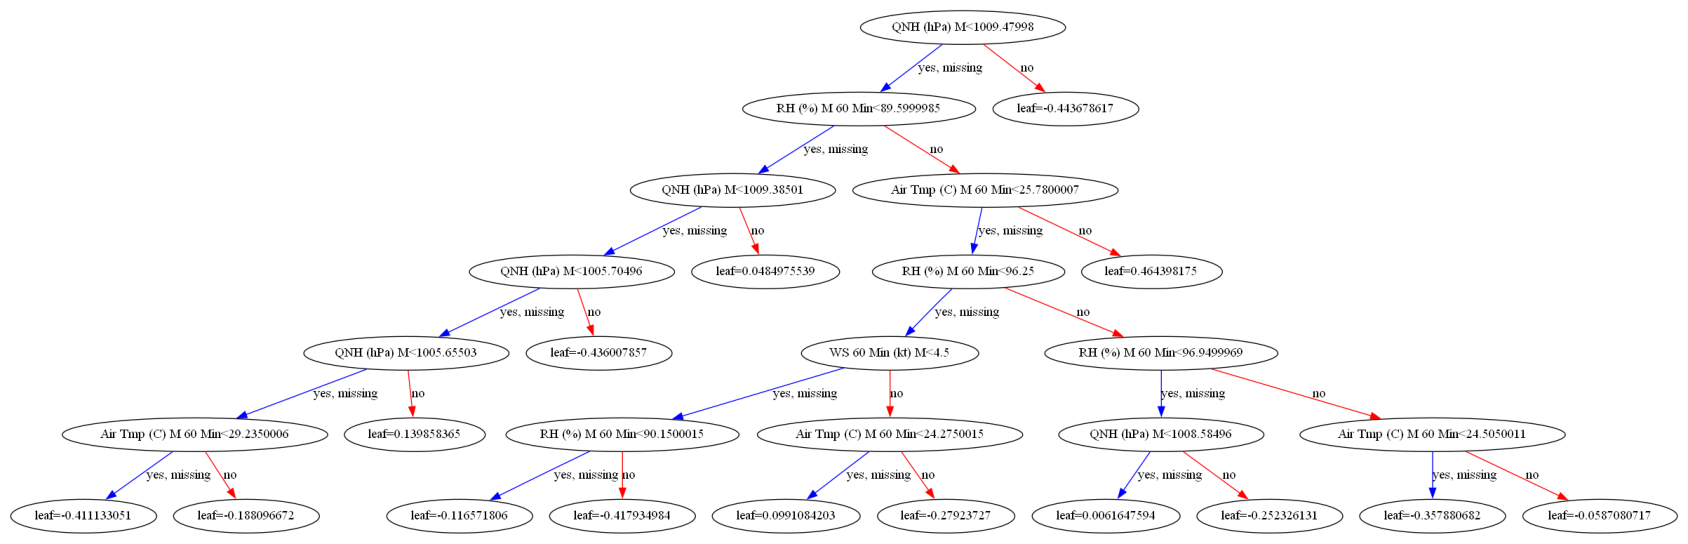

In [765]:
from xgboost import plot_tree

xgb_model.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(30, 30)) # set the size of the figure
plot_tree(xgb_model, num_trees=2, ax=ax) # plot the tree on the axes
plt.show() # show the plot

Hasil tuning

### Model Evaluation

In [766]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Train and evaluate the model with best hyperparameters on the validation set
best_xgb_model = XGBClassifier(**fine_search.best_params_,objective='binary:logistic')
best_xgb_model.fit(X_test, y_test)
y_pred = best_xgb_model.predict(X_test)


# calculate the accuracy, precision, recall, and F1-score of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

# calculate the ROC-AUC score of the model
roc_auc = roc_auc_score(y_test, y_pred)

# print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1-score: 0.98
ROC-AUC score: 0.75


In [767]:
from sklearn.metrics import  classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         7
           1       1.00      0.98      0.99       350

   micro avg       0.98      0.98      0.98       357
   macro avg       0.75      0.99      0.83       357
weighted avg       0.99      0.98      0.98       357
 samples avg       0.98      0.98      0.98       357



#### confussion matrix

[[  7   7]
 [  0 343]]


<AxesSubplot:>

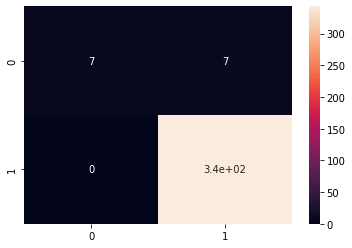

In [768]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(
    y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
sns.heatmap(cm, annot=True)

#### Visualisasi Tuning

In [769]:
result_coarse = search.cv_results_
result_fine = fine_search.cv_results_

In [770]:
params_key = [f"param_{p}" for p in params.keys()]
params_key.append('AUC_ROC')

In [771]:
AUC = []
for mean_score in result_coarse["mean_test_score"]:
    AUC.append(mean_score)
aoc_roc = {}
aoc_roc['AUC_ROC'] = AUC
result_coarse['AUC_ROC'] = AUC

In [772]:
AUC_Fine = []
for mean_score in result_fine["mean_test_score"]:
    AUC_Fine.append(mean_score)
aoc_roc_fine = {}
aoc_roc_fine['AUC_ROC'] = AUC_Fine
result_fine['AUC_ROC'] = AUC_Fine

In [773]:
import plotly.express as px
import plotly.graph_objs as go

# create a dataframe from results
fig = px.scatter(result_coarse, x = params_key[2], 
                    y = params_key[3], 
                    color = 'AUC_ROC')
fig.add_trace(px.scatter(result_fine, x = params_key[2], 
                    y = params_key[3]).data[0])

# menyatukan kedua plot dalam satu objek

fig.show()


In [774]:
import plotly.graph_objs as go

# data plot pertama
x1 = result_coarse['param_learning_rate']
y1 = result_coarse['mean_test_score']

# data plot kedua
x2 = result_fine['param_learning_rate']
y2 = result_fine['mean_test_score']

# membuat plot pertama
trace1 = go.Scatter(x=x1, y=y1, mode='markers', name='Coarse search')

# membuat plot kedua
trace2 = go.Scatter(x=x2, y=y2, mode='markers', name='Fine search')

# mengatur layout
layout = go.Layout(xaxis=dict(title='Learning rate', range=[0, 1]), yaxis=dict(title='AUC ROC'))

# menyatukan kedua plot dalam satu objek
fig = go.Figure(data=[trace1, trace2], layout=layout)

# menampilkan plot
fig.show()